<a href="https://colab.research.google.com/github/eminaomasa/energy_usage_prediction/blob/emiko/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA for Building Energy Usage Prediction 
This notebook shows descriptive statistics and exploratory data analysis of our dataset from the [kaggle competition](https://www.kaggle.com/c/widsdatathon2022/data). 

The target variable is the annual energy usage per square foot of a building (i.e., the site energy usage intensity (EUI)). The features include building characteristics (e.g., floor area, years of built, facility type) and weather data for the building’s location (e.g., annual average temperature, annual total precipitation, annual snowfalls). We received the training set with the target variable and the test set without the target variable. The training data has 75,757 observations covering 6 years from 7 states. The years and states are anonymized.

Note: Please run this notebook in google colab. All data are downloaded into google my drive and imported from my drive.

In [3]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 

In [5]:
# Read data from MyDrive (need to store the data into google MyDrve first)

train = pd.read_csv("gdrive/MyDrive/Data/train.csv")
test = pd.read_csv("gdrive/MyDrive/Data/test.csv")


In [6]:
# Report the number of rows and columns  
print("Number of train samples are", train.shape)
print("Number of test samples are", test.shape)

Number of train samples are (75757, 64)
Number of test samples are (9705, 63)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

The train set incldues 61 features, target variable (site_eui), and id. 

State_Factor, building_class, facility_type are categorical values. Year_factor is currently a numerical value, yet, it should be a categorical value as well. 
Moreover, for our anlaysis, 'id' is not necessary, so we drop it. 

In below, we convert year_factor to an object variable and drop 'id' column.

In [8]:
# convert year factor to object variable.

# For train data
train.Year_Factor = train.Year_Factor.astype('object')

# For test data 
test.Year_Factor = test.Year_Factor.astype('object')

Next, we check the descriptive statistics of the train data.

In [9]:
# Report the descriptive statistics 
train.describe(include="all").T.style

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year_Factor,75757.000000,6.000000,6.000000,22449.000000,nan,nan,nan,nan,nan,nan,nan
State_Factor,75757,7,State_6,50840,nan,nan,nan,nan,nan,nan,nan
building_class,75757,2,Residential,43558,nan,nan,nan,nan,nan,nan,nan
facility_type,75757,60,Multifamily_Uncategorized,39455,nan,nan,nan,nan,nan,nan,nan
floor_area,75757.000000,nan,nan,nan,165983.865858,246875.790940,943.000000,62379.000000,91367.000000,166000.000000,6385382.000000
year_built,73920.000000,nan,nan,nan,1952.306764,37.053619,0.000000,1927.000000,1951.000000,1977.000000,2015.000000
energy_star_rating,49048.000000,nan,nan,nan,61.048605,28.663683,0.000000,40.000000,67.000000,85.000000,100.000000
ELEVATION,75757.000000,nan,nan,nan,39.506323,60.656596,-6.400000,11.900000,25.000000,42.700000,1924.500000
january_min_temp,75757.000000,nan,nan,nan,11.432343,9.381027,-19.000000,6.000000,11.000000,13.000000,49.000000
january_avg_temp,75757.000000,nan,nan,nan,34.310468,6.996108,10.806452,29.827586,34.451613,37.322581,64.758065


Insights:

- The max value of the target variable (site_eui) tells possible extreme outliers. We may need to drop some of them. 
- For days_above_100F, days_above_110F, days_below_0F, most entries are zeros. 
- For directon_max_wind_speed, direction_peak_wind_speed, max_wind_speed, most data is 1. We need to investigate further. 
- The min of year built is zero, but it sounds unrealistics. So we should either drop these or replace with reasonable years.    

Next, we explore the distribution of each variable.

First, we plot the target variable of 'site_eui'. 

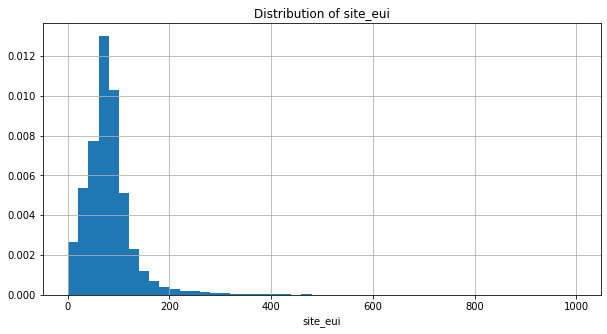

In [10]:
# Plot target variable
train.site_eui.hist(bins=50, figsize=(10,5), density=True)
plt.xlabel('site_eui')
plt.title('Distribution of site_eui');

Insights: 
- the distribbution of site_eui is largely skewed to right with a long right side tail. So, we onsider dropping outliers.

In below, we further investigate the outliers, top 1%, 2.5% and 5% of data. And we decided to drop top 1% of data as dropping top 1% is good enough to reduce the skewness of the dataset and we can keep the sample size of the dataset.

In [11]:
# report the 99, 97.5, 95% quantile values
train.site_eui.quantile(q=[0.95, 0.975, 0.99])

0.950    162.291404
0.975    215.132211
0.990    304.441285
Name: site_eui, dtype: float64

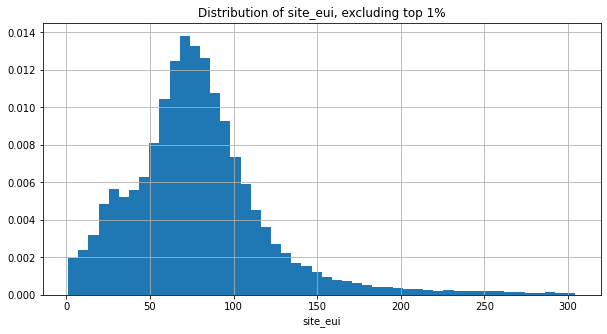

In [12]:
q99 = train.site_eui.quantile(q=[0.95, 0.975, 0.99])[0.99]

train[train.site_eui<q99].site_eui.hist(bins=50, figsize=(10,5), density=True)
plt.xlabel('site_eui')
plt.title('Distribution of site_eui, excluding top 1%');

By dropping the top 1%, the distribution of site_eui gets closer to the normal distrbution.

Next, we plot distributions for numeric variables.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


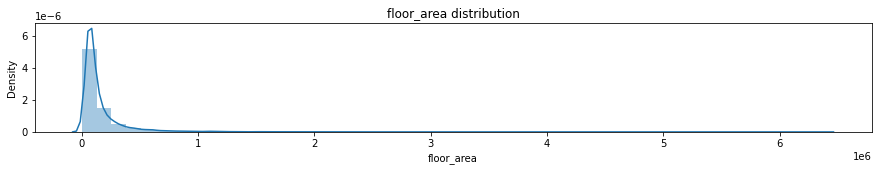

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


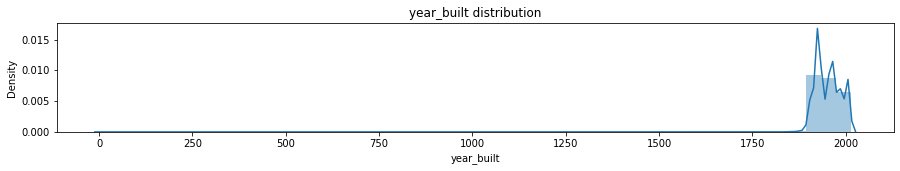

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


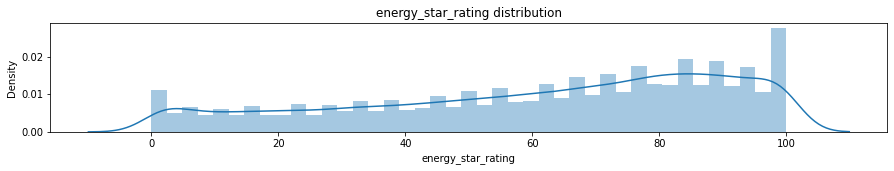

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


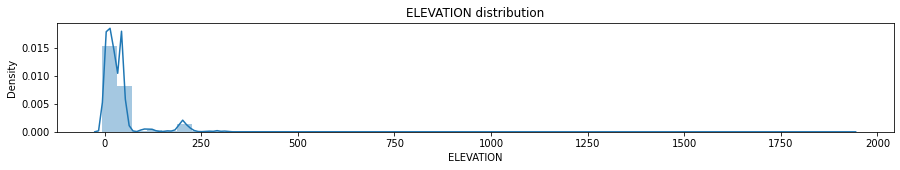

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


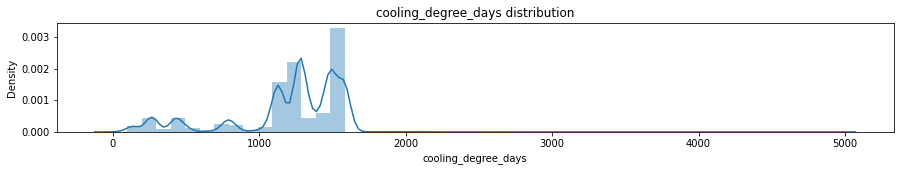

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


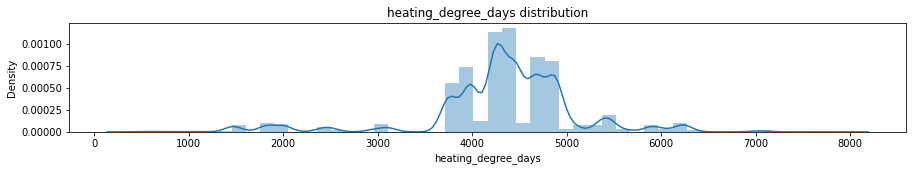

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


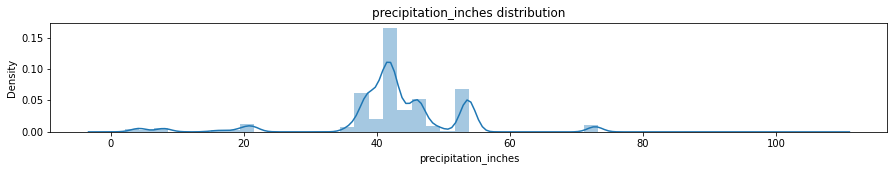

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


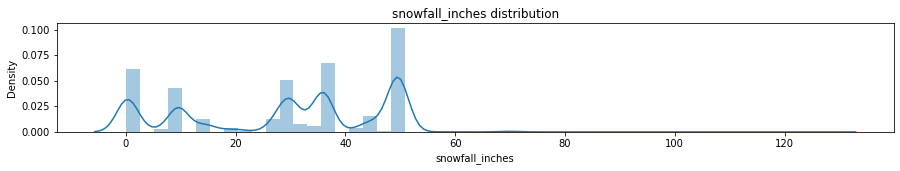

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


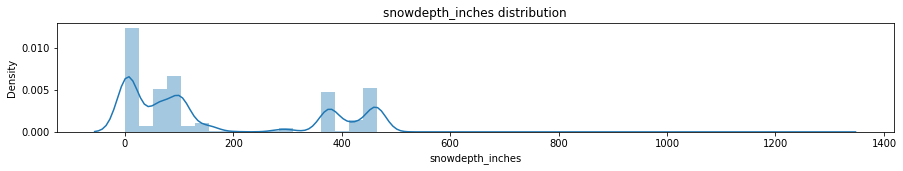

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


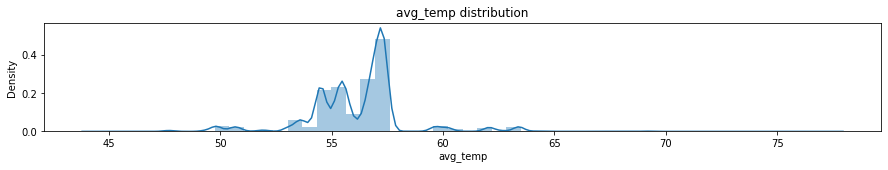

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


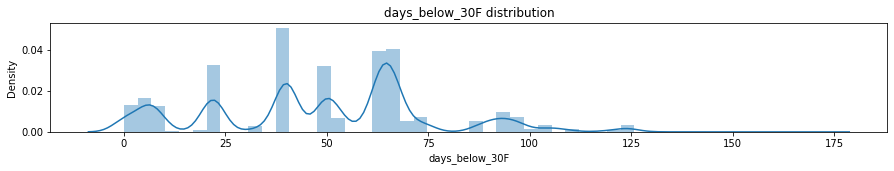

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


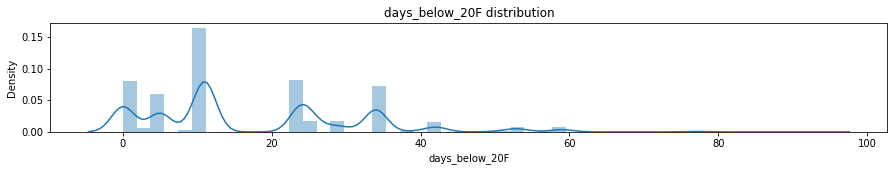

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


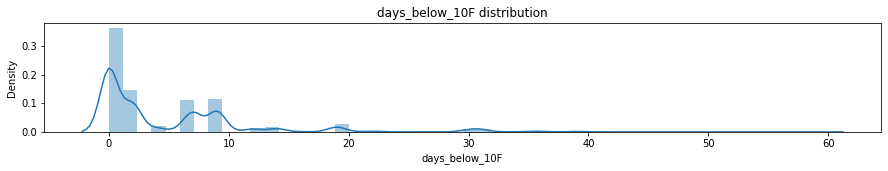

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


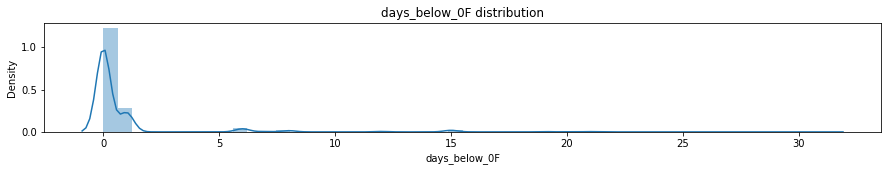

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


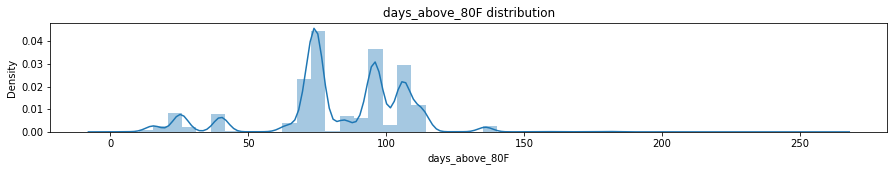

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


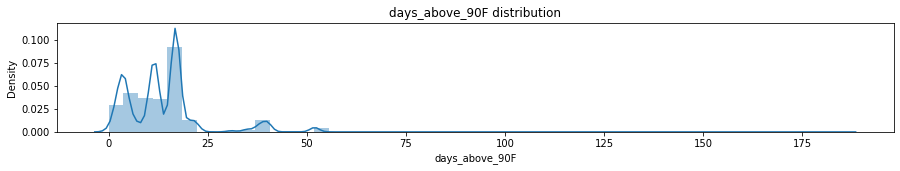

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


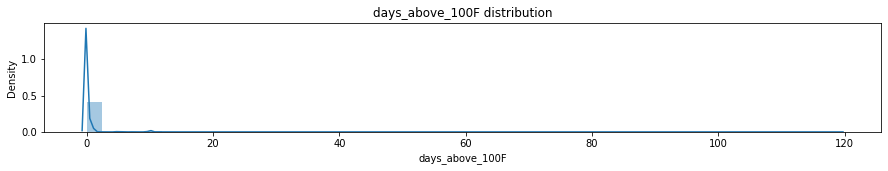

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


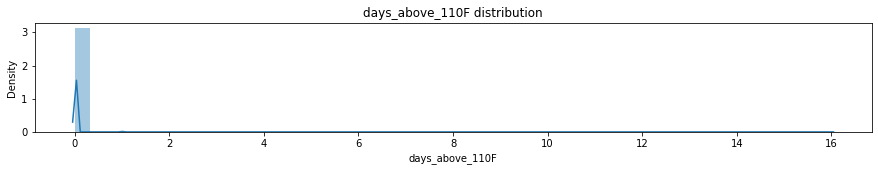

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


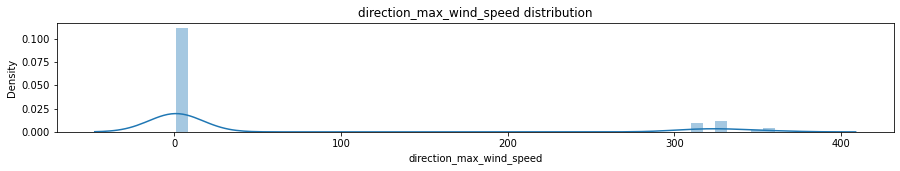

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


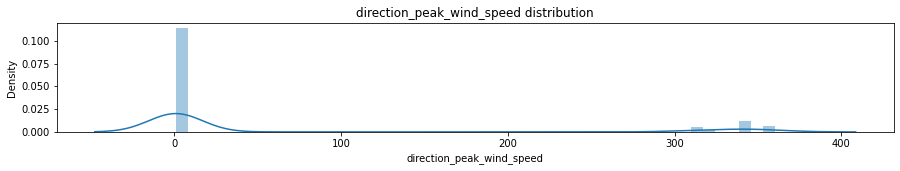

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


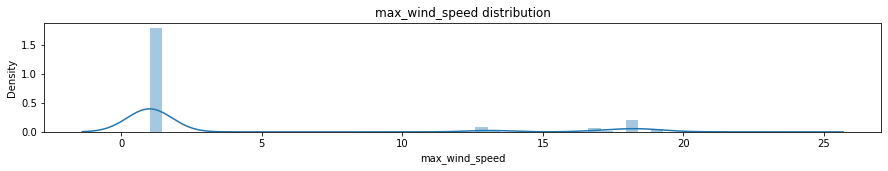

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


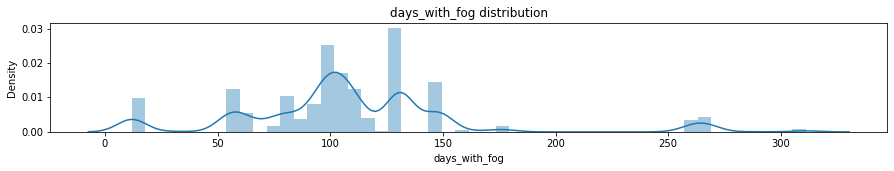

In [13]:
cols = [
    "floor_area",
    "year_built",
    "energy_star_rating",
    "ELEVATION",
    "cooling_degree_days",
    "heating_degree_days",
    "precipitation_inches",
    "snowfall_inches",
    "snowdepth_inches",
    "avg_temp",
    "days_below_30F",
    "days_below_20F",
    "days_below_10F",
    "days_below_0F",
    "days_above_80F",
    "days_above_90F",
    "days_above_100F",
    "days_above_110F",
    "direction_max_wind_speed",
    "direction_peak_wind_speed",
    "max_wind_speed",
    "days_with_fog",
]


for col in cols:
    plt.figure(figsize=(15, 2))
    sns.distplot(train[col], kde=True)
    plt.title(col + " distribution")
    plt.show()

Insights:

- Distributions of floor area, elevation, year build are extremely skewed. As discussed in above, year_build has many zeros, but it's unreasonable. It should be dropped or replaced with imputed values. The significantly larger floor areas may represent tall buildings. Some buildings are located in a very high elevation. 

- For days_above_100F, days_above_110F, and days_below_0F, majorities are zeros.
And for directon_max_wind_speed, direction_peak_wind_speed, max_wind_speed, most entries are 1s. We discuss this issues further in data cleaning notebook. 

Next, we plot temperatures of each month.

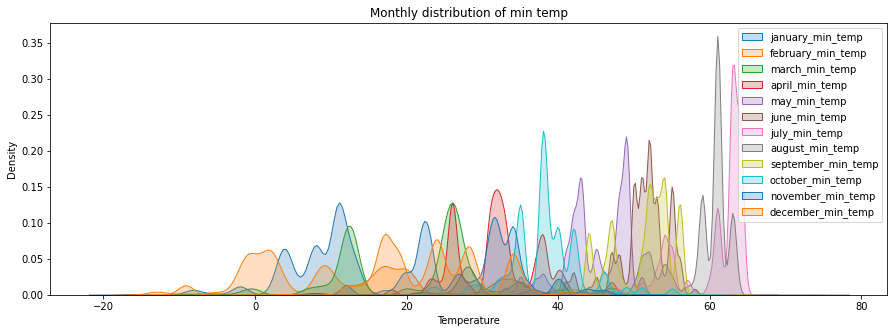

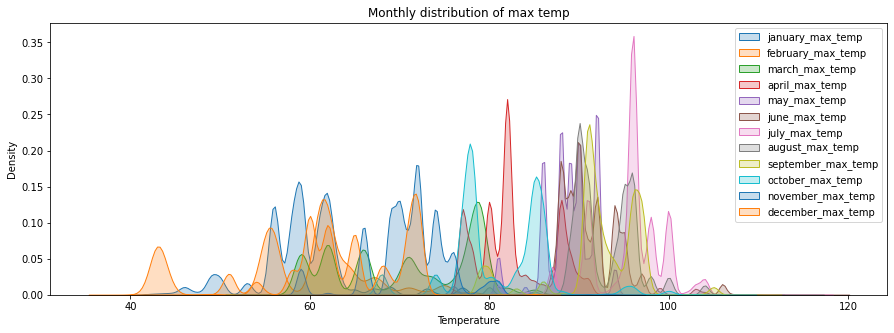

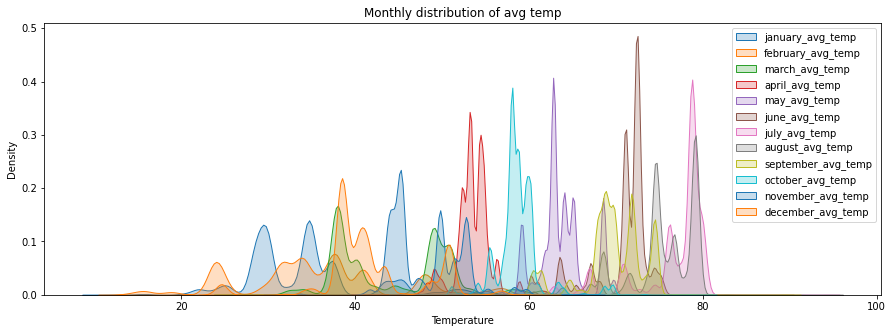

In [14]:
plt.figure(figsize=(15, 5))

min_temp = [
    "january_min_temp",
    "february_min_temp",
    "march_min_temp",
    "april_min_temp",
    "may_min_temp",
    "june_min_temp",
    "july_min_temp",
    "august_min_temp",
    "september_min_temp",
    "october_min_temp",
    "november_min_temp",
    "december_min_temp",
]
for col in min_temp:
    sns.kdeplot(train[col], shade=True)
    plt.xlabel("Temperature")
    plt.title("Monthly distribution of min temp")
plt.legend(min_temp)

plt.figure(figsize=(15, 5))
max_temp = [
    "january_max_temp",
    "february_max_temp",
    "march_max_temp",
    "april_max_temp",
    "may_max_temp",
    "june_max_temp",
    "july_max_temp",
    "august_max_temp",
    "september_max_temp",
    "october_max_temp",
    "november_max_temp",
    "december_max_temp",
]
for col in max_temp:
    sns.kdeplot(train[col], shade=True)
    plt.xlabel("Temperature")
    plt.title("Monthly distribution of max temp")
plt.legend(max_temp)

plt.figure(figsize=(15, 5))
avg_temp = [
    "january_avg_temp",
    "february_avg_temp",
    "march_avg_temp",
    "april_avg_temp",
    "may_avg_temp",
    "june_avg_temp",
    "july_avg_temp",
    "august_avg_temp",
    "september_avg_temp",
    "october_avg_temp",
    "november_avg_temp",
    "december_avg_temp",
]
for col in avg_temp:
    sns.kdeplot(train[col], shade=True)
    plt.xlabel("Temperature")
    plt.title("Monthly distribution of avg temp")
plt.legend(avg_temp)

Insights:
- min, max, and average temperature figures show similar patterns. July/August are the hottest months and Dec/Jan/Feb are the coldest months.  

Next, we plot the categorical variables. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


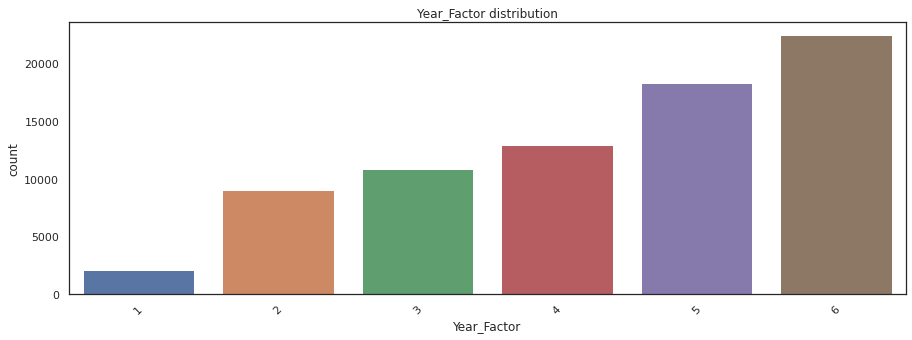

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


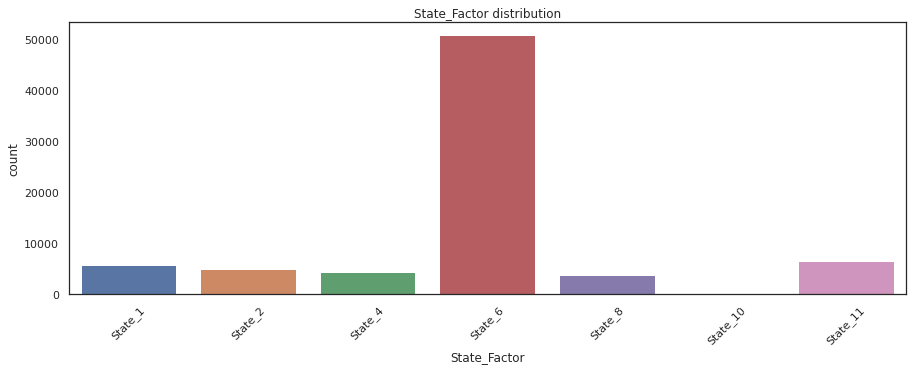

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


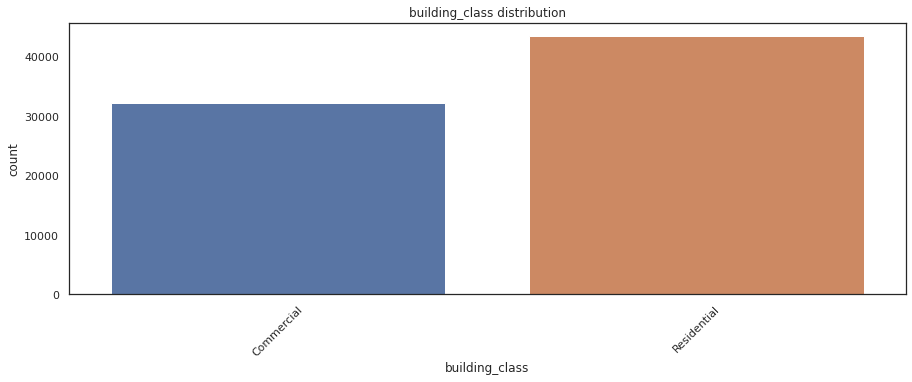

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


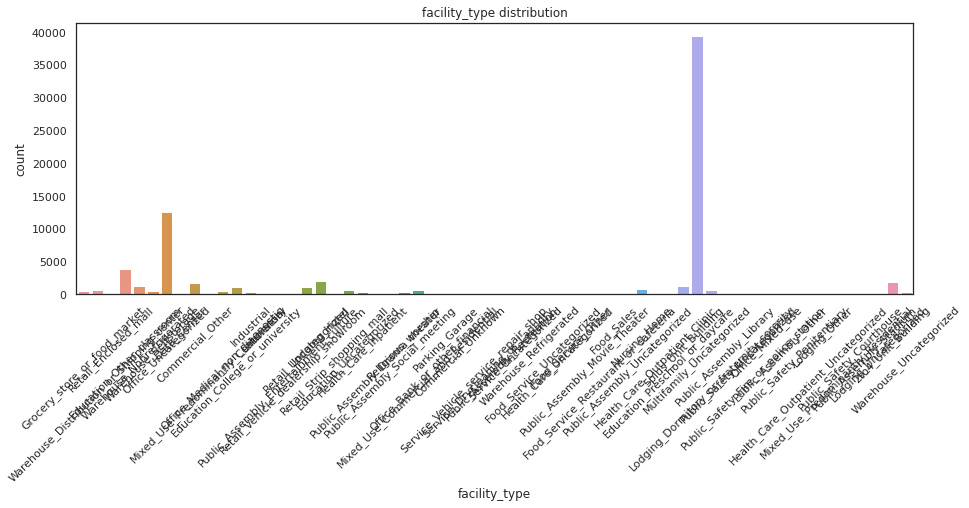

In [56]:
cate_cols = train.select_dtypes('object').columns

# plot distributions of categorical features
for col in cate_cols:
    plt.figure(figsize=(15, 5))
    sns.countplot(train[col])
    plt.title(col + ' distribution')  
    plt.xticks(rotation = 45)
    plt.show();

In [16]:
train.facility_type.value_counts()[:10]

Multifamily_Uncategorized          39455
Office_Uncategorized               12512
Education_Other_classroom           3860
Lodging_Hotel                       2098
2to4_Unit_Building                  1893
Commercial_Other                    1744
5plus_Unit_Building                 1273
Warehouse_Nonrefrigerated           1255
Retail_Uncategorized                1130
Education_College_or_university     1056
Name: facility_type, dtype: int64

Insights:
- The sample size has increased over the years. year = 1 has the lowest number of observations, and year = 6 has the largest number of observation. 
- Most building samples are from State_6. 
- About 40% are commercial buuildings and 60% are residencials.
- Most buildings are categorized multifamily_uncategorized and office_uncategorized.    


Next, we explore the relationship between target variable (site_eui) and features. For rest of the anlaysis, we drop the top 1% of site_eui.

Plot EUI and energy star ratings. 

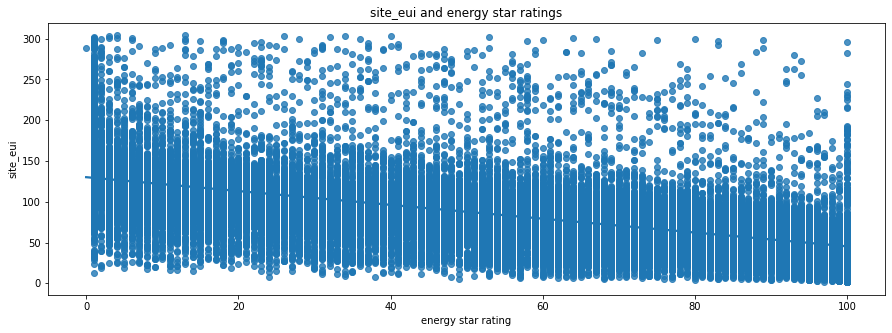

In [43]:
# Drop the top 1% of site_eui
train2 = train[train.site_eui<q99]

# Plot site_eui and energy star ratings. 
plt.figure(figsize=(15, 5))
sns.regplot(x="energy_star_rating", y="site_eui", data=train2)
plt.title('site_eui and energy star ratings')
plt.xlabel('energy star rating')
plt.ylabel('site_eui');

Insights: 
- The higher the rating, the lower the site_eui. 

Next, we plot eui and floor areas.

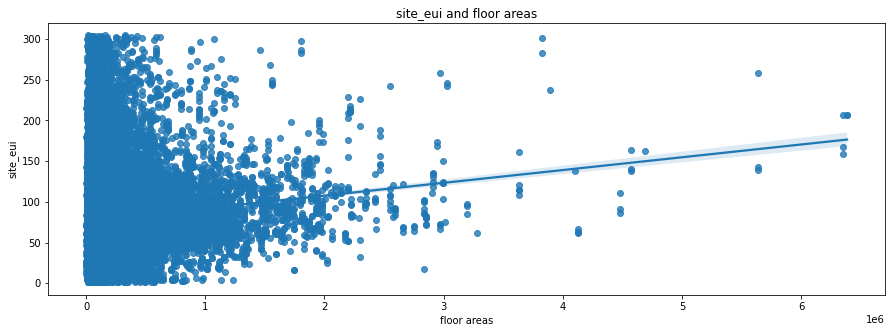

In [18]:
# Plot site_eui and floor areas. 
plt.figure(figsize=(15, 5))
sns.regplot(x="floor_area", y="site_eui", data=train2)
plt.title('site_eui and floor areas')
plt.xlabel('floor areas')
plt.ylabel('site_eui');

Insights:
- The larger the floor areas, the higher eui. 

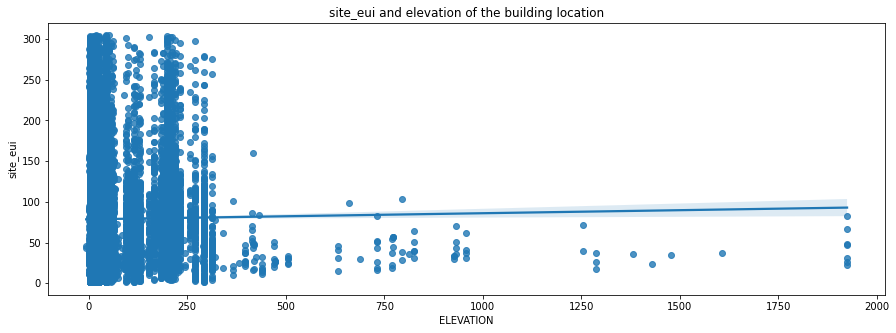

In [19]:
# Plot elevation and eui. 
plt.figure(figsize=(15, 5))
sns.regplot(x="ELEVATION", y="site_eui", data=train2)
plt.title('site_eui and elevation of the building location')
plt.xlabel('ELEVATION')
plt.ylabel('site_eui');

Insights:
- There is no clear relationship between eui and elevation of the building location. 

Next, plot year built and eui.

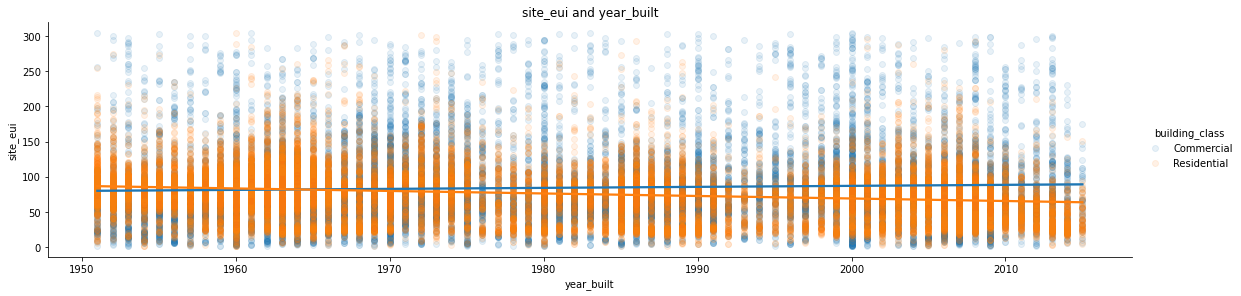

In [41]:
# Drop the year built before 1950 
train3 = train2[train2.year_built>1950]

# Plot eui and the year built. 
sns.lmplot(x="year_built", y="site_eui", data=train3, hue='building_class', scatter_kws={'alpha':0.1}, height=4, aspect=4)
plt.title('site_eui and year_built')
plt.xlabel('year_built')
plt.ylabel('site_eui');

Insights:

- For residential buildings, newerly built buildings show slightly lower eui. 
- For commercial buildings, there is no clear relaitonship between year built and eui. 


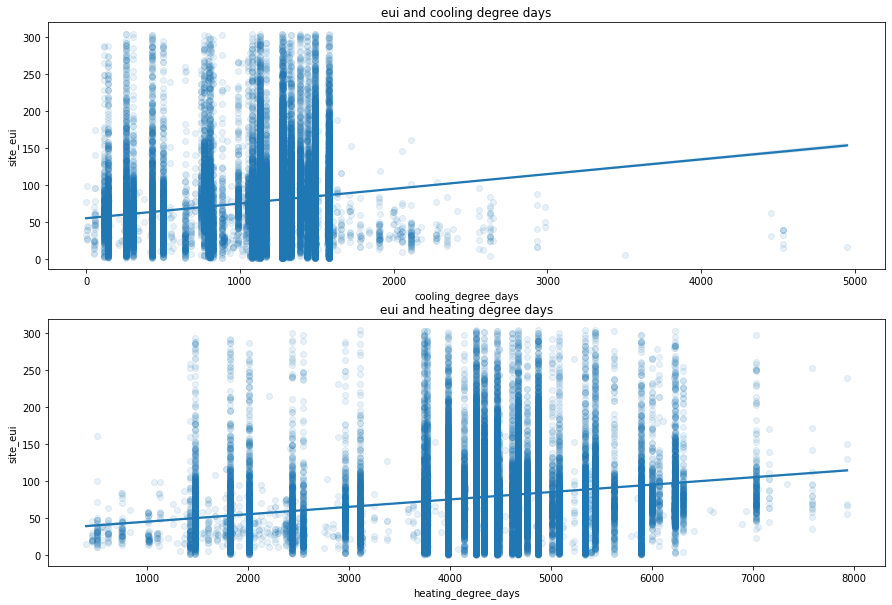

In [33]:
# Plot eui and cooling degree days. 
fig, ax =plt.subplots(2,1, figsize=(15, 10))


sns.regplot(x="cooling_degree_days", y="site_eui", data=train2,  ax=ax[0], scatter_kws={'alpha':0.1}).set(title='eui and cooling degree days')
sns.regplot(x="heating_degree_days", y="site_eui", data=train2,  ax=ax[1], scatter_kws={'alpha':0.1}).set(title='eui and heating degree days');




Insights:
- Extreme temperture for both direction (cold and hot) is associated with higher energy usage.   

Next, we investigate the relationship between eui and the categorical variables.

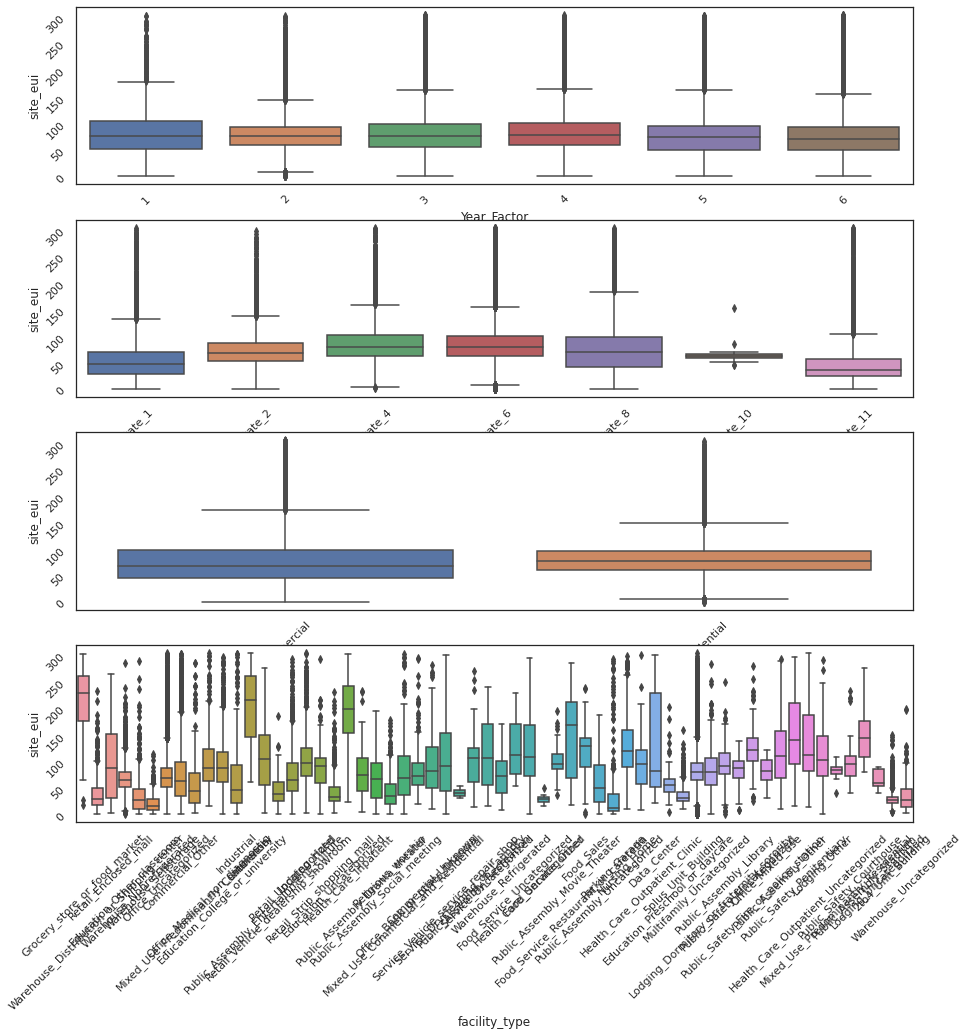

In [44]:
# Plot eui and categorical values. 
plt.figure(figsize=(15, 15))
sns.set(style="white")
i = 1
for col in cate_cols:
    plt.subplot(4, 1, i)
    ax = sns.boxplot(data=train2, x=col, y="site_eui")
    i = i + 1
    ax.tick_params(labelrotation=45)
plt.show()


In [50]:
# Report average site_eui by facility type. 

train2.groupby('facility_type')['site_eui'].mean().sort_values(ascending=False)

facility_type
Grocery_store_or_food_market                 216.884425
Laboratory                                   207.496529
Health_Care_Inpatient                        192.135248
Public_Assembly_Stadium                      157.041663
Food_Service_Restaurant_or_cafeteria         153.894847
Public_Safety_Penitentiary                   152.365059
Data_Center                                  138.151988
Health_Care_Outpatient_Uncategorized         135.651257
Food_Service_Uncategorized                   128.801496
Nursing_Home                                 126.308080
Health_Care_Uncategorized                    126.059710
Public_Safety_Fire_or_police_station         125.384423
Food_Sales                                   117.644868
Public_Assembly_Other                        116.389926
Lodging_Other                                114.546842
Service_Uncategorized                        113.565430
Public_Assembly_Entertainment_culture        108.604191
Service_Vehicle_service_repair_sho

Insights: 
- site_eui are almost constant overtime, but varies across states. state_4 and state_6 has higher eui than other states.  
- No significant difference in site_eui between commercial and residencial buildings. 
- There are significant differences in site_eui across facility types; highest eui for Grocery_store_or_food_market, Laboratory, Health_Care_Inpatien, and lower eui for warehoouse related facility.  


Next we report Peason correlations between eui and features.  

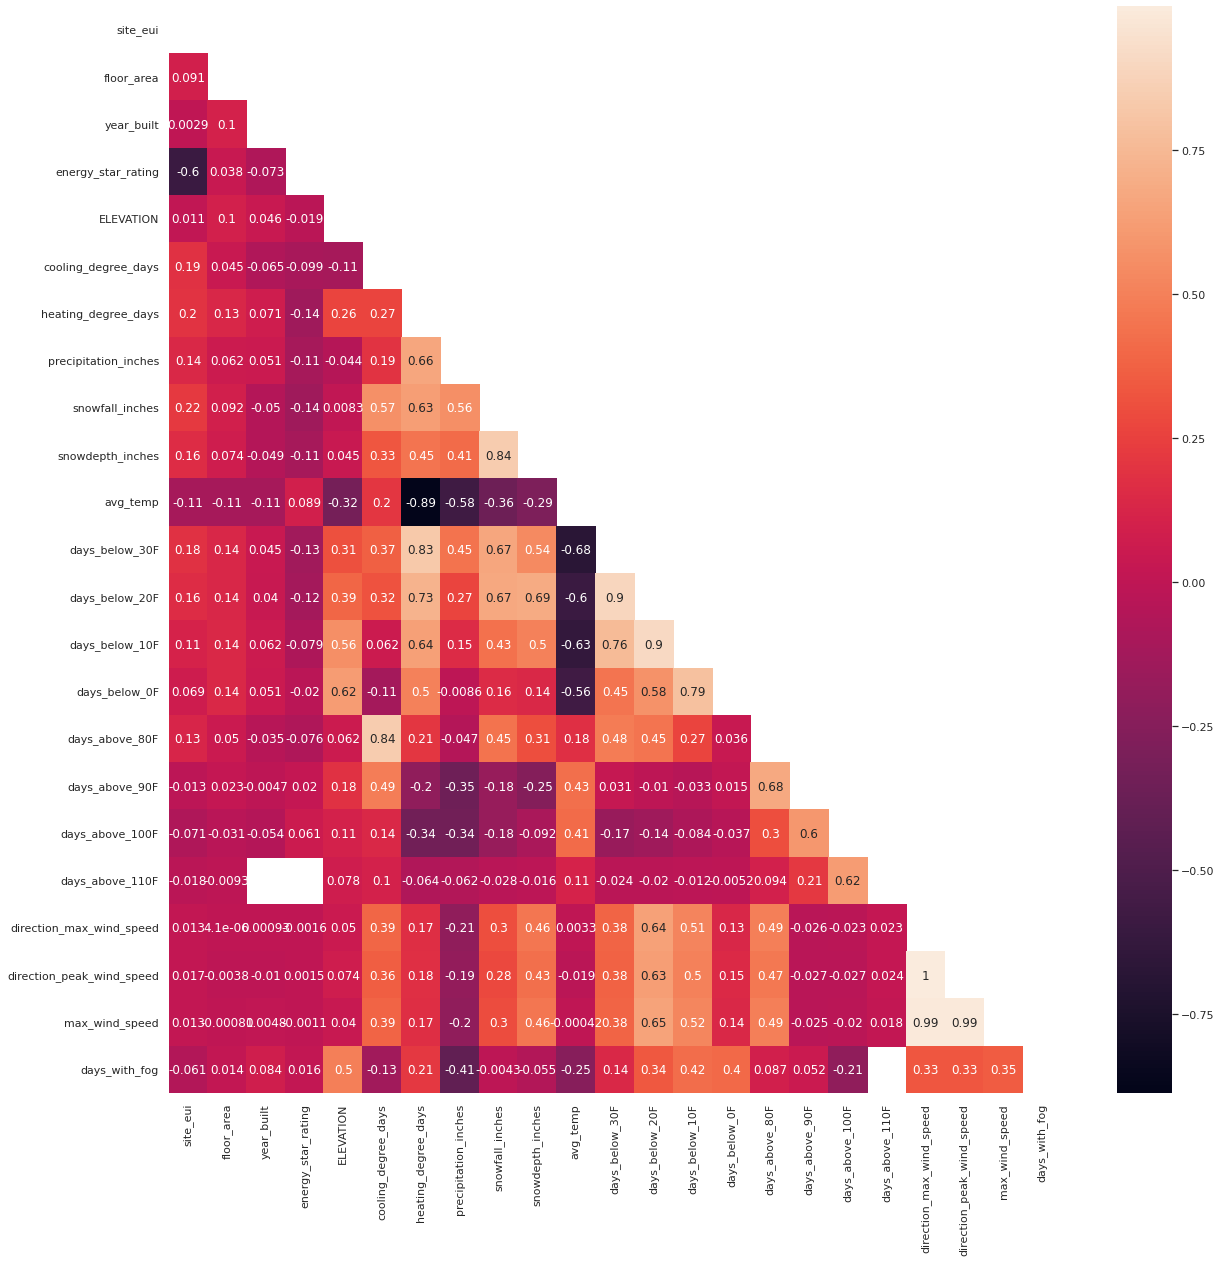

In [64]:
# Correlation between y and X
cols = [
    "site_eui",
    "floor_area",
    "year_built",
    "energy_star_rating",
    "ELEVATION",
    "cooling_degree_days",
    "heating_degree_days",
    "precipitation_inches",
    "snowfall_inches",
    "snowdepth_inches",
    "avg_temp",
    "days_below_30F",
    "days_below_20F",
    "days_below_10F",
    "days_below_0F",
    "days_above_80F",
    "days_above_90F",
    "days_above_100F",
    "days_above_110F",
    "direction_max_wind_speed",
    "direction_peak_wind_speed",
    "max_wind_speed",
    "days_with_fog",
]


corr = train2[cols].corr()
# heatmap 
fig, ax=plt.subplots(figsize=(20,20))
sns.heatmap(data=corr,
            mask=np.triu(np.ones_like(corr, dtype=bool)), 
            ax=ax,
            annot = True,
            );

Insights:
- We see high correlation between some features, including average temperature and heating degree days, snowfall inches and snowdepth inches, days below 30F and days below 20F, days below 20F and days below 10F, days below 30F and heating degree days, below above 80F and cooling degree days, and three wind speed related measures.

In this notebook, we explored the distribution of each variable, reported the relationship between the target variable and each feature, and then reported the correlation between variavles. 
This gives insights on the strongly related features, such as energy star ratings , type of facility, and temperatures of the building location.  